# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)



# Call Option - Time sensitivity

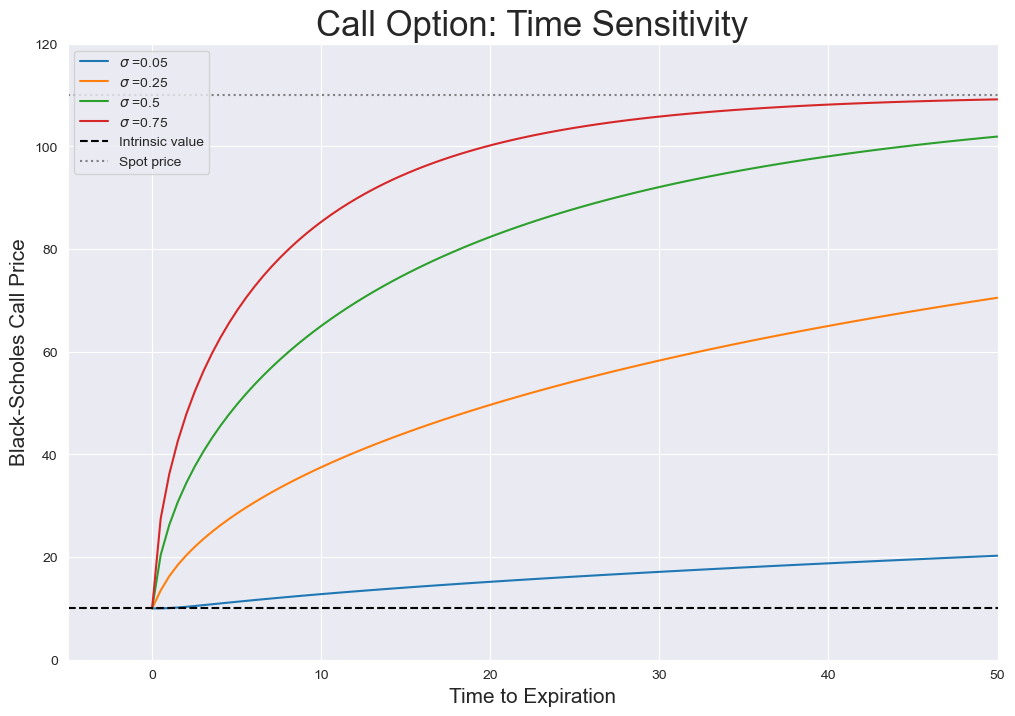

In [156]:
S0 = 110
K = 100
sigma_values = [0.05, 0.25, 0.5,0.75]
times = np.linspace(1/252, 50, 100)
plt.figure(figsize = (12,8))

for sigma in sigma_values:
    call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]
    plt.plot(times, call_prices, label=f"$\sigma$ ={sigma}")
    plt.legend()


plt.title('Call Option: Time Sensitivity', size = 25)
plt.ylim(0, 120)
plt.xlim(-5,50)
plt.axhline(y=10,color='black',linestyle="--",label="Intrinsic value")
plt.axhline(y=110,color='grey',linestyle=":", label="Spot price")
plt.legend()
plt.xlabel('Time to Expiration',fontsize=15)
plt.ylabel('Black-Scholes Call Price',fontsize=15)
plt.savefig("Call_Time_sensitivity.png")
plt.show()

The above graph shows the Black-Scholes pricing of an in-the-money call option, for different levels of volatility. The strike price is 100 and the spot price is 110. As the strike price is lower than the spot price, the call option is already in-the-money and has an intrinsic value of 10.


1. **Increasing function $\frac{\partial C}{\partial T} > 0$**: As the time to expiration increases, the option becomes more valuable. If more time is left for expiration, then there are more chances for the stock price to move such that the option value increases. Therefore, the call option price increases with more time to expiration. This behavior is more pronounced when the volatality increases, as a more volatile stock is more likely to increase in value. We see this in the graph too. When the volatility is very high - (1) even when there is a lot of time left for expiry, the option is highly valuable (2) Closer to the expiry, an option of a stock that is more volatile has a higher slope showing more sensitivity to time.
3. **Decreasing slope $\frac{\partial^2 C}{\partial T^2} < 0 $**: The slope of the curve decreases as the time to expiry increases. So the curve flattens. This is expected because, extra time to expiry has a diminishing marginal benefit.
4. **Intercept $\lim_{T \to 0} C = Max(S-K,0)$**: As the time approaches the expiration, the option does not have any time value, but only intrinsic value. So, the intercept as $T \to 0$ should reach the intrinsic value 10, which is what we observe.
5. **Horizontal Asymptote $\lim_{T \to \infty} C = S_0$**: As the time to expiry increases, the option price asymptotes to the spot price. Even for a highly volatile stock, the price of the option cannot exceed the spot price. Because if the option costs more than the spot price, no one would buy the option when they can directly buy the stock at spot price no matter how much time is left for expiry.

Note: Unrealistically large time to expiry and volatility are also considered to understand the limiting cases and build an intuition for the pricing.

# Call Option - Spot Price sensitivity

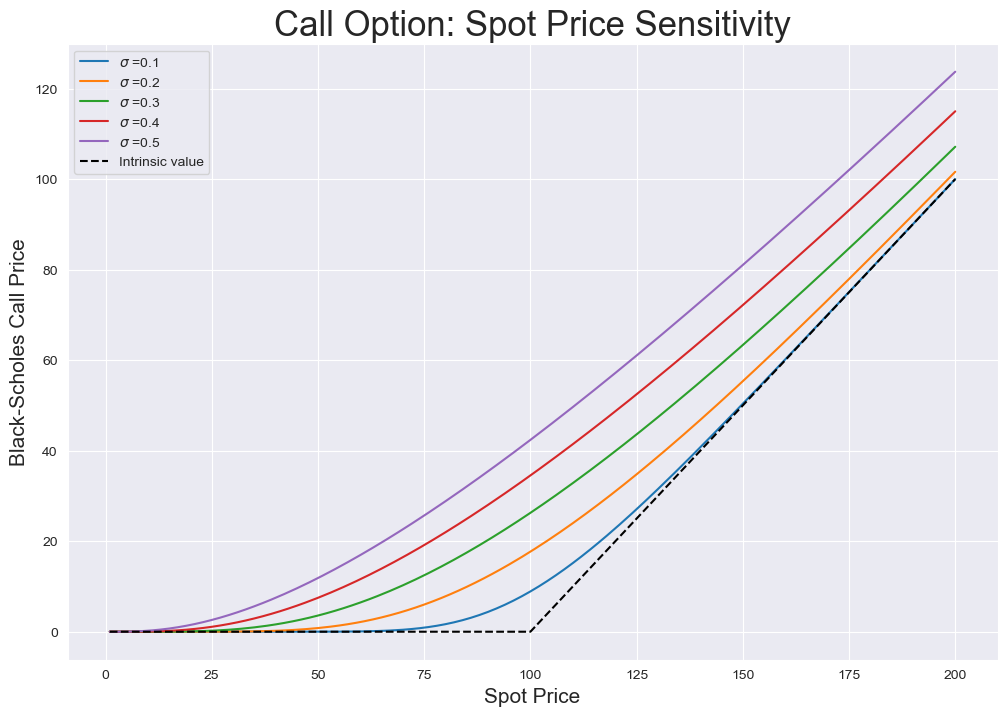

In [157]:

S0_array = np.linspace(1, 200, 200)
K = 100
sigma_values = [0.1,0.2,0.3,0.4, 0.5]
t = 5
plt.figure(figsize = (12,8))
for sigma in sigma_values:
    call_prices = [bs_call(S0_array[i],K,sigma, t) for i in range(len(S0_array))] 
    plt.plot(S0_array, call_prices, label=f"$\sigma$ ={sigma}")
    plt.legend()


intrinsic_call = np.maximum(S0_array - K, 0)


plt.title('Call Option: Spot Price Sensitivity', size = 25)
plt.plot(S0_array, intrinsic_call, color="black", linestyle="--",label= "Intrinsic value")
plt.legend()
plt.xlabel('Spot Price',fontsize=15)
plt.ylabel('Black-Scholes Call Price',fontsize=15)
plt.savefig("Call_S0_sensitivity.png")
plt.show()

1. **Increasing function** $\frac{\partial C}{\partial S_0} > 0$: A call options gets more valuable when the likelihood of the price increasing above the strike price increases. If the spot price is higher, the starting point from which this increase has to happen is pushed higher, increasing this likelihood. Therefore, the price of a call option increases when the spot price increases.
2. **Decreasing slope** $\frac{\partial^2 C}{\partial S_0^2} > 0$: As the spot price increases,both the probability of having a positive payoff as well as the size of the payoff increase as explained before. hen the option is deep out of money, the option is almost worthless; an extra dollar in the stock barely changes that. Therefore the slope is closer to 0. When the option is deep in the money, the payoff is almost certain and it rises dollar-for-dollar with the stock—just like being long one share.Therefore the slope is close to +1. 
3. **Intercept** $\lim_{S_0 \to 0} C = 0$: This is trivially true. If the underlying stock does not have any value, then the derivative option cannot have any value either. 
4. **Asymoptote** $\lim_{S_0 \to \infty} C = S - K $: The option is deep in-the-money in this limit. If one has an option to buy a stock at a price that is significantly lower than the spot price, the option is sure to be exercised and therefore it is almost equivalent to owning a stock. So the value of the option must approach the intinsic value. Lower the volatility the lower the spot price at which this limit is approached. This is because, for a stock with low volatility the likelihood of exercising the option in such a case is higher. 

# Put Option - Time sensitivity

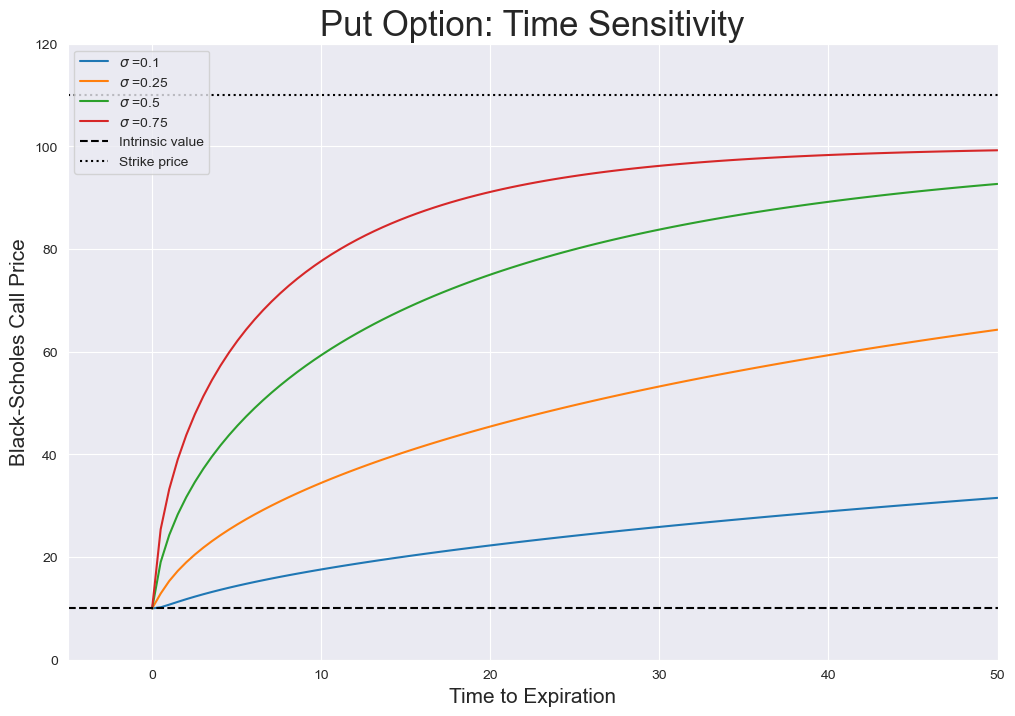

In [158]:

S0 = 90
K = 100
sigma_values = [0.1,0.25, 0.5,0.75]
times = np.linspace(1/252, 50, 100)
plt.figure(figsize = (12,8))

for sigma in sigma_values:
    put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
    plt.plot(times, put_prices, label=f"$\sigma$ ={sigma}")
    plt.legend()


plt.title('Put Option: Time Sensitivity', size = 25)
plt.ylim(0, 120)
plt.xlim(-5,50)
plt.axhline(y=10,color='black',linestyle="--",label="Intrinsic value")
plt.axhline(y=110,color='black',linestyle=":", label="Strike price")
plt.legend()
plt.xlabel('Time to Expiration',fontsize=15)
plt.ylabel('Black-Scholes Call Price',fontsize=15)
plt.savefig("Put_Time_sensitivity.png")
plt.show()

The above graph shows the Black-Scholes pricing of an in-the-money put option, for different levels of volatility. The strike price is 100 and the spot price is 90. As the strike price is higher than the spot price, the put option is already in-the-money and has an intrinsic value of 10.


1. **Increasing function $\frac{\partial P}{\partial T} > 0$**: As the time to expiration increases, the option becomes more valuable. If more time is left for expiration, then there are more chances for the stock price to move such that the option value increases. Therefore, the put option price increases with more time to expiration. This behavior is more pronounced when the volatality increases, as a more volatile stock is more likely to increase in value. We see this in the graph too. When the volatility is very high - (1) even when there is a lot of time left for expiry, the option is highly valuable (2) Closer to the expiry, an option of a stock that is more volatile has a higher slope showing more sensitivity to time.
2. **Decreasing slope $\frac{\partial^2 P}{\partial T^2} < 0 $**: The slope of the curve decreases as the time to expiry increases. So the curve flattens. This is expected because, extra time to expiry has a diminishing marginal benefit.
3. **Intercept  $\lim_{T \to 0} P = Max(K - S, 0)$**: As the time approaches the expiration, the option does not have any time value, but only intrinsic value. So, the intercept as $T \to 0$ should reach the intrinsic value 10, which is what we observe.
4. **Horizontal Asymptote  $\lim_{T \to \infty} P = K$**: As the time to expiry increases, the option price asymptotes to the strike price. Even for a highly volatile stock, the price of the option cannot exceed the strike price. Because if the option costs more than the strike price, no one would buy the option when the maximum price they can sell the stock at is the strike price. It does not make sense to pay more than the stirke price, as that is sure to make a loss, no matter how much time is left for expiration.


Note: Unrealistically large time to expiry and volatility are considered to understand the limiting cases and build an intuition for the pricing.

# Put Option - Spot price sensitivity

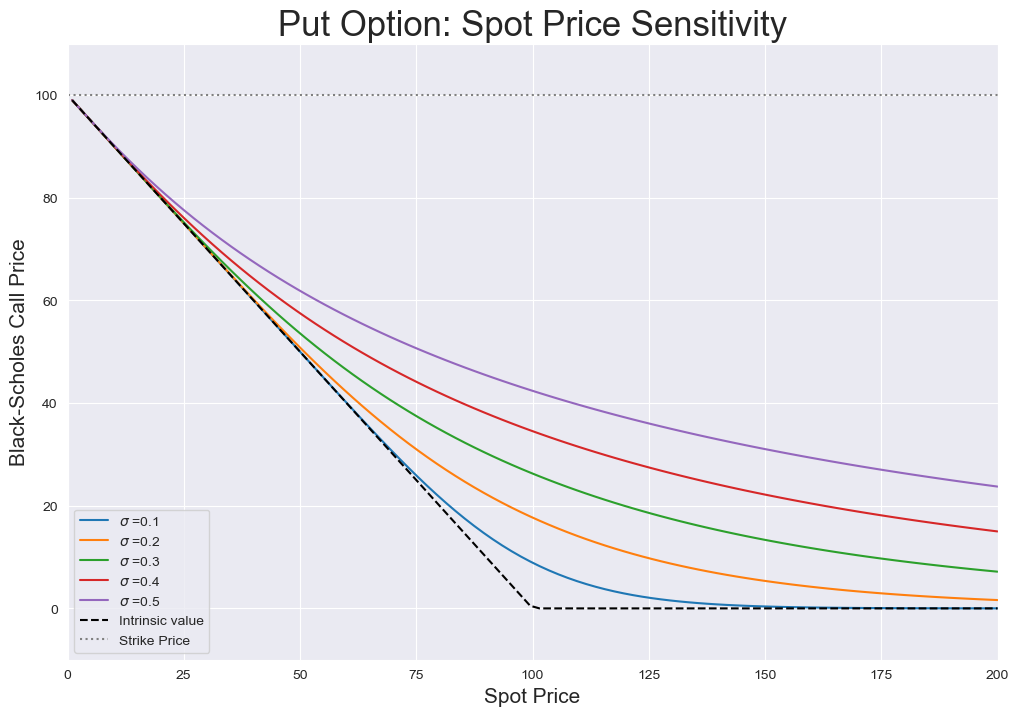

In [159]:

S0_array = np.linspace(1, 200, 100)
K = 100
sigma_values = [0.1,0.2,0.3,0.4, 0.5]
t = 5
plt.figure(figsize = (12,8))
for sigma in sigma_values:
    put_prices = [bs_put(S0_array[i],K,sigma, t) for i in range(len(S0_array))] 
    plt.plot(S0_array, put_prices, label=f"$\sigma$ ={sigma}")
    plt.legend()


intrinsic_call = np.maximum(-S0_array + K, 0)


plt.title('Put Option: Spot Price Sensitivity', size = 25)
plt.plot(S0_array, intrinsic_call, color="black", linestyle="--",label= "Intrinsic value")
plt.axhline(y=K, label="Strike Price", linestyle=":", color="grey")
plt.legend()
plt.xlim(0,200)
plt.ylim(-10, 110)
plt.xlabel('Spot Price',fontsize=15)
plt.ylabel('Black-Scholes Call Price',fontsize=15)
plt.savefig("Put_S0_sensitivity.png")
plt.show()

1. **Decreasing function** $\frac{\partial P}{\partial S_0} < 0$: A put options gets more valuable when the likelihood of the price decreasing below the strike price increases. If the spot price is higher, the starting point from which this decrease has to happen is pushed higher, decreasing this likelihood. Therefore, the price of a put option decreases when the spot price increases.
2. **Decreasing slope** $\frac{\partial^2 P}{\partial S_0^2} < 0$: As the spot price increases, both the probability of having a positive payoff as well as the size of the payoff decreases as explained before. When the option is deep in the money, the payoff is almost certain and it falls dollar-for-dollar with the stock—just like being short one share.Therefore the slope is close to -1. When the option is deep out of money, the option is almost worthless; an extra $1 in the stock barely changes that. Therefore the slope is closer to +1.
3. **Intercept** $\lim_{S_0 \to 0} P = K$: Even if the underlying stock's worth is close to 0, if we have an option to sell the stock at the strike price, the option is sure to be exercised and is worth same amount as the strike price.
4. **Asymptote** $\lim_{S_0 \to \infty} P = 0$: If the strike price is much lower than the spot price, then the put option is worthless. One can already sell a stock at a price higher than what the option allows one to do. At every given spot price, a put option for more volatile stock is worth more because there are higher chances of the stock price decreasing below the strike price. Therefore, the spot price at which the asymptote is reached increases with volatility.